In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def load_dataset(name, lable_in_last):
    path = os.path.join("..", "datasets", name)
    data = pd.read_csv(path)
    data = data.values
    if lable_in_last:
        xs = data[:, :-1].astype('float32')
        ys = data[:, -1]
    else:
        xs = data[:, 1:].astype('float32')
        ys = data[:, 0]
    return xs, ys

In [3]:
spam_x, spam_y = load_dataset("spam.csv", True)
cancer_x, cancer_y = load_dataset("cancer.csv", False)

In [4]:
scaler = MinMaxScaler()
spam_x = scaler.fit_transform(spam_x)
cancer_x = scaler.fit_transform(cancer_x)

In [5]:
spam_train_x, spam_val_x, spam_train_y, spam_val_y = train_test_split(
    spam_x, spam_y, test_size=0.2)
cancer_train_x, cancer_val_x, cancer_train_y, cancer_val_y = train_test_split(
    cancer_x, cancer_y, test_size=0.2)

In [6]:
def convert_lables(ys):
    ys_unique = np.sort(np.unique(ys))
    ys_converted = np.zeros(ys.shape)
    ys_converted[ys == ys_unique[0]] = -1
    ys_converted[ys == ys_unique[1]] = 1
    return ys_converted

def get_accuracy(w, xs, ys):
    res = (1 / (1 + np.exp(xs @ w)) < 0.5).astype(int)
    res[res == 0] = -1
    ys = convert_lables(ys)
    return np.mean((res == ys))

def build_logistic_regression(train_xs, train_ys, val_xs, val_ys, lr=5, batch_size=8, num_epochs=200):
    train_accs = []
    val_accs = []
    
    train_ys = convert_lables(train_ys)
    val_ys = convert_lables(val_ys)
    
    w = np.zeros(train_xs.shape[1])
    for epoch in range(num_epochs):
        for i in range(train_xs.shape[0] // batch_size):
            grad = 0
            for j in range(i * batch_size, (i + 1) * batch_size):
                grad += train_ys[j] * train_xs[j] / (1 + np.exp(train_ys[j] * w @ train_xs[j]))
            w += lr * (1 / batch_size * grad)
        
        train_accs.append(get_accuracy(w, train_xs, train_ys))
        val_accs.append(get_accuracy(w, val_xs, val_ys))
        
    return w, (train_accs, val_accs)

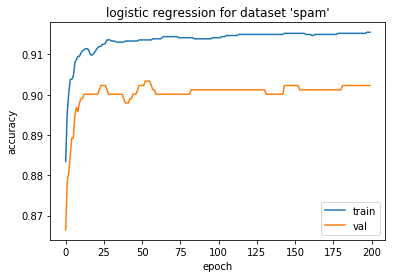

In [7]:
_, (train_accs, val_accs) = build_logistic_regression(spam_train_x, spam_train_y, spam_val_x, spam_val_y)

xs = list(range(len(train_accs)))
plot1, = plt.plot(xs, train_accs)
plot2, = plt.plot(xs, val_accs)

plt.title("logistic regression for dataset 'spam'")
plt.legend([plot1, plot2], ["train", "val"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

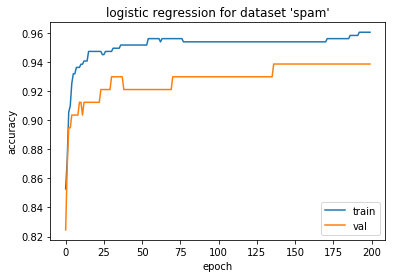

In [8]:
_, (train_accs, val_accs) = build_logistic_regression(cancer_train_x, cancer_train_y, cancer_val_x, cancer_val_y)

xs = list(range(len(train_accs)))
plot1, = plt.plot(xs, train_accs)
plot2, = plt.plot(xs, val_accs)

plt.title("logistic regression for dataset 'spam'")
plt.legend([plot1, plot2], ["train", "val"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()